# Street Lights in Boston

### Summary
Exploratory Data Analysis (EDA) on street lights location in the City of Boston.  In addition, a function is provided to determine the numbers of lights in a radius given a lat and long.

- Data downloaded from (https://data.boston.gov/dataset/streetlight-locations)


In [1]:
import itertools
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
DATA_ROOT = '../data/'
FIGURES_ROOT = '../figures/streetlights'
DATA_DIR = os.path.join(DATA_ROOT, 'raw/boston')
SHAPE_DIR = os.path.join(DATA_ROOT, 'raw/shapefile')
WRITE_DIR = os.path.join(DATA_ROOT, 'interim/streetlights')
readfile_sam = os.path.join(DATA_DIR, 'sam-addresses.csv')
readfile_streets = os.path.join(SHAPE_DIR, 'street-segments/Boston_Street_Segments.shp')
readfile_boston = os.path.join(SHAPE_DIR, 'city-boundary/City_of_Boston_Boundary.shp')

print('{}\n{}\n{}\n{}\n'.format(readfile_sam, readfile_streets, readfile_boston, WRITE_DIR))

../data/raw/boston\sam-addresses.csv
../data/raw/shapefile\street-segments/Boston_Street_Segments.shp
../data/raw/shapefile\city-boundary/City_of_Boston_Boundary.shp
../data/interim/streetlights



In [3]:
# mkdir for writing new data if it doesn't already exist
if not os.path.exists(WRITE_DIR):
    os.mkdir(WRITE_DIR)

# mkdir for saving figures if it doesn't already exist
if not os.path.exists(FIGURES_ROOT):
    os.mkdir(FIGURES_ROOT)

In [4]:
gdf_streets = gpd.read_file(readfile_streets)
gdf_boston = gpd.read_file(readfile_boston)

In [5]:
# load data from csv file
df_lights = pd.read_csv('../data/processed/streetlight-locations.csv')

# quick eda of the dataframe
print("Lights Dataframe Shape:", df_lights.shape)
print()
print("Lights Dataframe Head:") 
display(df_lights.head())
print()
print("Lights Dataframe Description:")
display(df_lights.describe())
print()
print("Lights Dataframe Information:")
display(df_lights.info())

Lights Dataframe Shape: (74065, 6)

Lights Dataframe Head:


the_geom  OBJECTID   TYPE        Lat  \
0    POINT (-71.0760443807948 42.35315925057316)         1  LIGHT  42.353159   
1  POINT (-71.07538171240694 42.353347768071195)         2  LIGHT  42.353348   
2   POINT (-71.07477488057383 42.35352052068278)         3  LIGHT  42.353521   
3    POINT (-71.07440373484715 42.3535558201314)         4  LIGHT  42.353556   
4   POINT (-71.07362079549182 42.35381056415504)         5  LIGHT  42.353811   

        Long                         Location  
0 -71.076044  (42.3531592506, -71.0760443808)  
1 -71.075382  (42.3533477681, -71.0753817124)  
2 -71.074775  (42.3535205207, -71.0747748806)  
3 -71.074404  (42.3535558201, -71.0744037348)  
4 -71.073621  (42.3538105642, -71.0736207955)


Lights Dataframe Description:


OBJECTID           Lat          Long
count  74065.000000  74065.000000  74065.000000
mean   37033.000000     42.330993    -71.080297
std    21380.868181      0.031495      0.035254
min        1.000000     42.232589    -71.183561
25%    18517.000000     42.308773    -71.099727
50%    37033.000000     42.335927    -71.074150
75%    55549.000000     42.353736    -71.056993
max    74065.000000     42.396182    -70.929731


Lights Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74065 entries, 0 to 74064
Data columns (total 6 columns):
the_geom    74065 non-null object
OBJECTID    74065 non-null int64
TYPE        74026 non-null object
Lat         74065 non-null float64
Long        74065 non-null float64
Location    74065 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 3.4+ MB


None

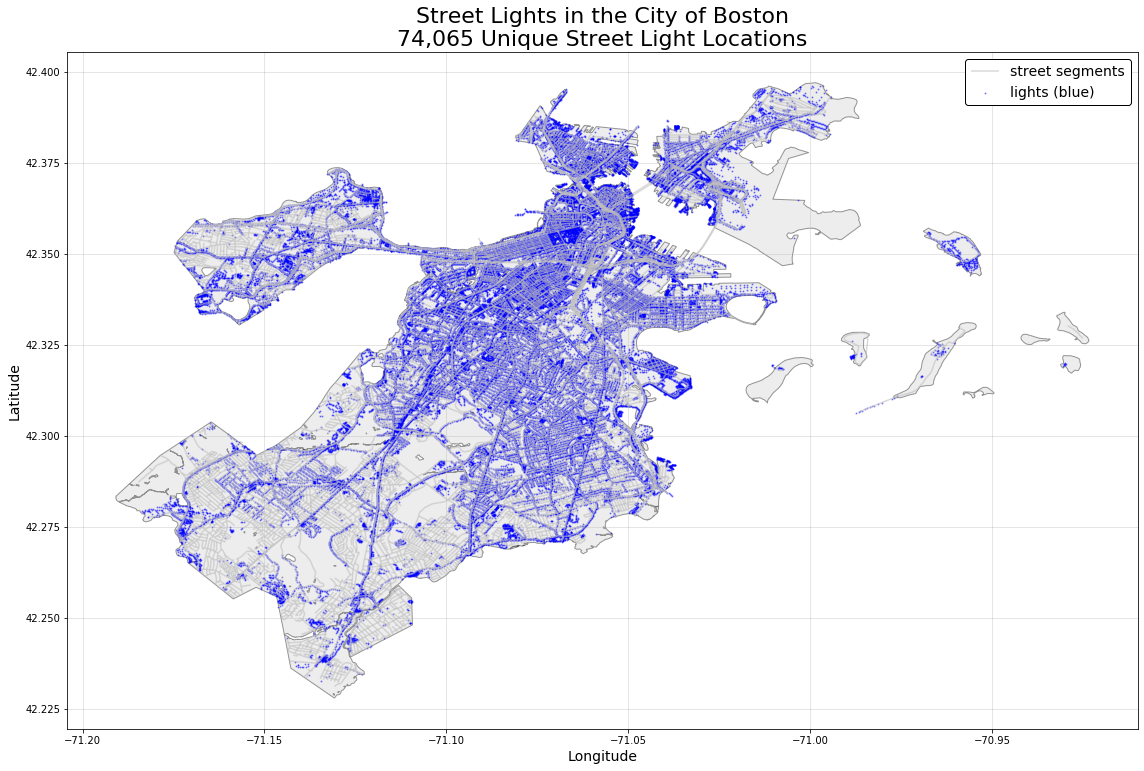

Wall time: 3.28 s


In [24]:
%%time
savefig=True

# plot unique SAM records with city boundary and street segments overlays 
fig, ax = plt.subplots(figsize=(16,11))
gdf_boston.plot(ax=ax, color='lightgray', edgecolor='k', alpha=0.4)
gdf_streets.plot(ax=ax, color='silver', edgecolor='k', alpha=.6, label='street segments')
plt.title(
    'Street Lights in the City of Boston\n'\
    '{:,} Unique Street Light Locations'.format(
        len(df_lights)
    ),
    fontsize=22
)
plt.scatter(df_lights['Long'], df_lights['Lat'], alpha=0.4, color="blue", s=1, label='lights (blue)')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.grid(":", alpha=0.4)
plt.legend(edgecolor='k', framealpha=1, fontsize=14)
plt.tight_layout()
if savefig:
    plt.savefig(os.path.join(FIGURES_ROOT, 'street-lights_overall.png'))
plt.show();

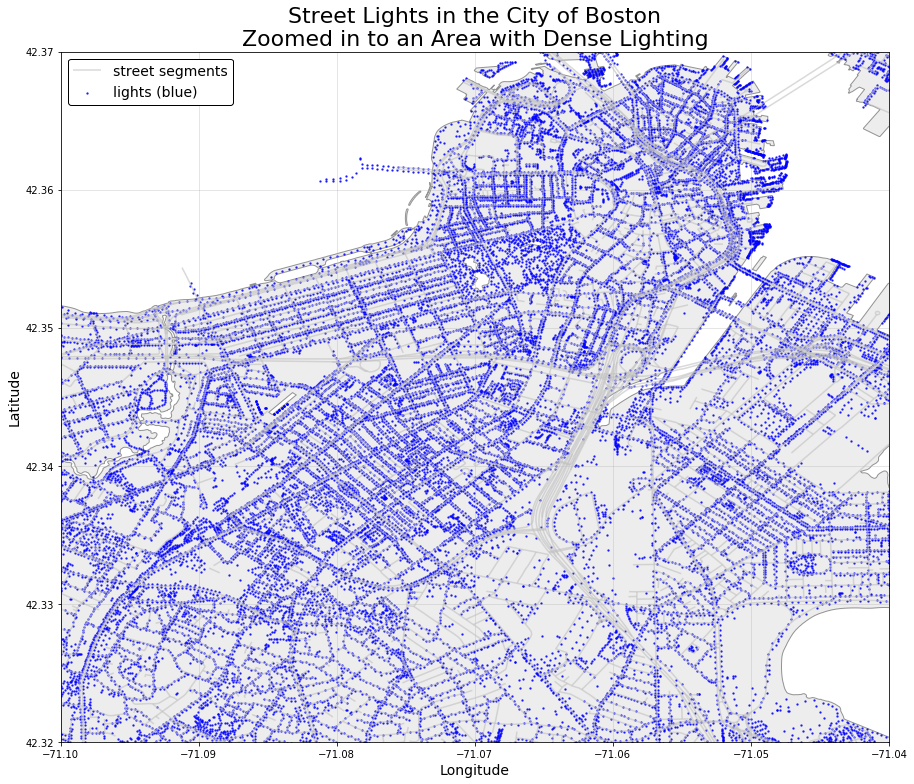

Wall time: 3.04 s


In [28]:
%%time
savefig=True

# plot unique SAM records with city boundary and street segments overlays 
fig, ax = plt.subplots(figsize=(16,11))
gdf_boston.plot(ax=ax, color='lightgray', edgecolor='k', alpha=0.4)
gdf_streets.plot(ax=ax, color='silver', edgecolor='k', alpha=.6, label='street segments')
plt.title(
    'Street Lights in the City of Boston\n'\
    'Zoomed in to an Area with Dense Lighting', fontsize=22
)
plt.scatter(df_lights['Long'], df_lights['Lat'], alpha=0.7, color="blue", s=2, label='lights (blue)')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.xlim(left=-71.10, right=-71.04)
plt.ylim(bottom=42.32, top=42.37)
plt.grid(":", alpha=0.4)
plt.legend(edgecolor='k', framealpha=1, fontsize=14)
plt.tight_layout()
if savefig:
    plt.savefig(os.path.join(FIGURES_ROOT, 'street-lights_dense.png'))
plt.show();

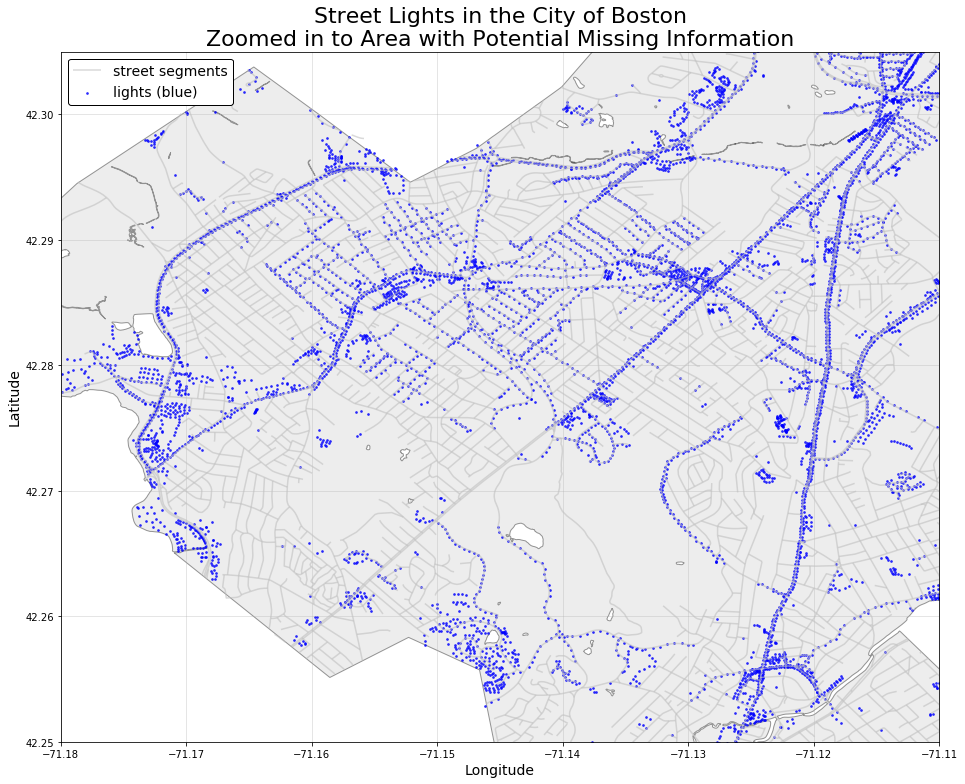

Wall time: 4.26 s


In [26]:
%%time
savefig=True

# plot unique SAM records with city boundary and street segments overlays 
fig, ax = plt.subplots(figsize=(16,11))
gdf_boston.plot(ax=ax, color='lightgray', edgecolor='k', alpha=0.4)
gdf_streets.plot(ax=ax, color='silver', edgecolor='k', alpha=.6, label='street segments')
plt.title(
    'Street Lights in the City of Boston\n'\
    'Zoomed in to Area with Potential Missing Information', fontsize=22
)
plt.scatter(df_lights['Long'], df_lights['Lat'], alpha=0.7, color="blue", s=3, label='lights (blue)')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.xlim(left=-71.18, right=-71.11)
plt.ylim(bottom=42.250, top=42.305)
plt.grid(":", alpha=0.4)
plt.legend(edgecolor='k', framealpha=1, fontsize=14)
plt.tight_layout()
if savefig:
    plt.savefig(os.path.join(FIGURES_ROOT, 'street-lights_missing.png'))
plt.show();

#### Insights:

The lower-left corner of the map has no lights except for major roads.  We are unsure as to whether this is the ground truth or if the dataset is incomplete.   Google street view appears to show street lights on streets in 02132 (West Roxbury) where the dataset indicates there are none.

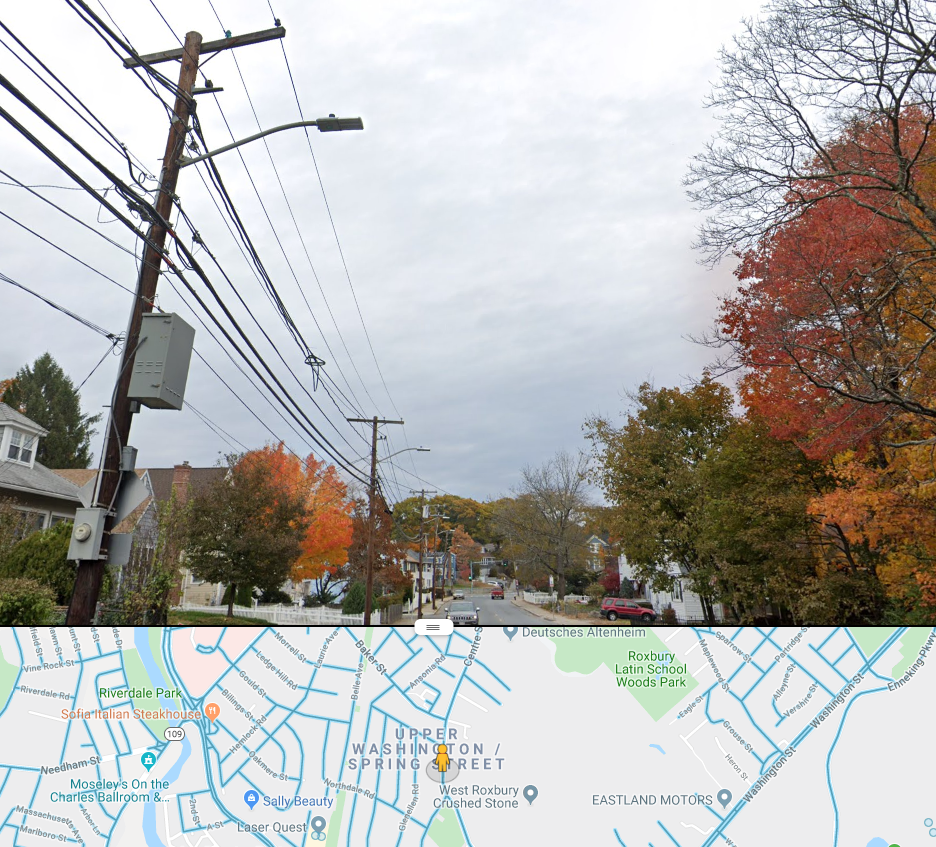

In [27]:
from IPython.display import Image
Image(filename='../figures/streetlights/street-lights_present-01.png') 

#### Notes:

All crime occurs all over the city so will have a near perfect overlap with lights.  Looking at one type of serious crime may be more informative.

Create density heatmap?

In [46]:
from math import cos, asin, sqrt

# function modified from (https://stackoverflow.com/questions/365826)
def distance(lat1, lon1, lat2, lon2):
    """
    Calculate distance in meters given two input gps coordinates
    """
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p)*(1-cos((lon2-lon1)*p))/2
    
    return (12742 * asin(sqrt(a))) * 1000

In [45]:
# distance test Widener to Boston City Hall Plaza (checked with Google Maps Measurement Tool)
distance (42.373392, -71.116507, 42.360126, -71.059320)

4924.382348283845

In [ ]:
def coord_density(df1, df2, threshold):
    """
    
    """
    light_density = []
    
    for i in df1:
        lat1 = df1['Lat']
        lon1 = df1['Long']
        counter = 0
        for j in df2:
            lat2 = df2['Lat']
            lon2 = df2['Long']
            dist = distance(lat1, lon1, lat2, lon2)
            if dist > threshold:
                counter += 1
        light_density.append(counter)
            
    return light_density

In [56]:
df_crime

42.2918158

In [ ]:
# number of lights within 100m of Boston City Hall plaza
lats1 = [42.360126]
lons1 = [-71.059320]
coord_density(df_crime, )

In [53]:
df_crime = pd.read_csv('../data/raw/crime/crime-incidents.csv')

In [54]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436666 entries, 0 to 436665
Data columns (total 17 columns):
INCIDENT_NUMBER        436666 non-null object
OFFENSE_CODE           436666 non-null int64
OFFENSE_CODE_GROUP     426840 non-null object
OFFENSE_DESCRIPTION    436666 non-null object
DISTRICT               434440 non-null object
REPORTING_AREA         436666 non-null object
SHOOTING               11573 non-null object
OCCURRED_ON_DATE       436666 non-null object
YEAR                   436666 non-null int64
MONTH                  436666 non-null int64
DAY_OF_WEEK            436666 non-null object
HOUR                   436666 non-null int64
UCR_PART               426730 non-null object
STREET                 423236 non-null object
Lat                    399636 non-null float64
Long                   399636 non-null float64
Location               436666 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 56.6+ MB


In [14]:
%%time

# create unique property record counts for each street by name and by id 
prop_streets = df_locs['FULL_STREET_NAME'].value_counts().sort_index().index
street_ids = df_locs['STREET_ID'].value_counts().sort_index().index

# create master key for matching street id numbers to corresponding street names
street_id_key = df_locs.groupby('STREET_ID').agg(
    {
        'FULL_STREET_NAME': 'first'
    }
)

# generate array with all unique pairwise street id combination
# this will be used to evaluate all possible street intersections
street_id_combos = np.array(list(itertools.combinations(street_ids, 2)))

CPU times: user 3.11 s, sys: 268 ms, total: 3.38 s
Wall time: 3.38 s


In [15]:
print(
    'There are:\n\n\t1) {0:,} unique street names\n\t2) {1:,} unique street ids, '\
    'resulting in...\n\t3) {2:,} possible pairwise street id combinations to evaluate '\
    'as possible intersections.\n'.format(
        len(prop_streets), len(street_ids), len(street_id_combos)
    )
)

There are:

	1) 4,085 unique street names
	2) 4,350 unique street ids, resulting in...
	3) 9,459,075 possible pairwise street id combinations to evaluate as possible intersections.



In [16]:
print(street_id_combos[:5])
street_id_key.head()

[['1' '10']
 ['1' '100']
 ['1' '1000']
 ['1' '1001']
 ['1' '1002']]


FULL_STREET_NAME
STREET_ID                 
1                     A St
10             Academy Ter
100              Altair Rd
1000           Copeland Pl
1001           Copeland St

In [17]:
# create dictionary of street id to street name for mapping values
street_id_map_dict = dict(zip(street_id_key.index, street_id_key.values.ravel()))

In [18]:
%%time

# create dictionary of arrays for all properties associated with each street id
# each key is a unique street_id, each value is an np.array of the lat/lon
# coordinates for every property on that street
street_arrays = {
    street_id: df_locs.loc[df_locs['STREET_ID']==street_id][['X', 'Y']].values
    for street_id in street_ids
}

CPU times: user 36.7 s, sys: 0 ns, total: 36.7 s
Wall time: 36.7 s


In [19]:
# confirm dict length matches list of unique street_ids
len(street_arrays) == len(street_ids)

True

In [20]:
# define functions for measuring distance between properties and to identify
# possible intersections

def distance(locs1, locs2, r=3958.75, meters=True):
    """
    Converts distances between lat/lon points to meters using the Haversine
    formula for measuring distance on a sphere

    If the desire is to measure pairwise distances between two coordinate
    arrays of equal length, or between two single sets of coordinates, this
    function can simply be called as `distance(locs1, locs2)`

    If the desire is to measure the distances of each coordinate in array 1
    all coordinates in array 2, the function needs to be called in this
    manner `distance(locs1[:, None], locs2)`
    
    locs1: np.array or list of lat/lon points
    locs2: np.array or list of lat/lon points
    r: float, default=3958.75, great sphere approximated radius of the earth
       in kilometers
    meters: boolean, default=True, specifies the output
            units of the distances returned by this function, meters if True,
            and kilometers if False
    
    returns: np.array of the distances between coordinates in either meters
             or kilometers
    """
    if meters:
        r = r * 1000
    
    # convert lat/lon coordinates to radians
    locs1 = locs1 * np.pi / 180
    locs2 = locs2 * np.pi / 180
    
    cos_lat1 = np.cos(locs1[..., 0])
    cos_lat2 = np.cos(locs2[..., 0])
    
    cos_lat_d = np.cos(locs1[..., 0] - locs2[..., 0])
    cos_lon_d = np.cos(locs1[..., 1] - locs2[..., 1])
    
    return r * np.arccos(cos_lat_d - cos_lat1 * cos_lat2 * (1 - cos_lon_d))


def id_intersections(street_id_combos, street_arrays, street_id_dict, threshold, verbose=False):
    """
    Evaluates street combinations to determine if they likely intersect, and if they
    so, approximates an intersection lat/lon coordinate based on observed property
    locations.
    
    street_id_combos: np.array containing possible pairwise combinations of streets
                      to evaluate for intersections
    street_arrays: dictionary in which each key is a street id and the corresponding
                   value is an np.array of all property location coordinates on that
                   street
    street_id_dict: dictionary for mapping street ids to street names, each key
                    is a street id and each value the corresponding street name
    threshold: integer or float of threshold distance between nearest properties in two
               pairwise street arrays, below which the streets are classified as
               intersecting
    verbose: boolean, defaul=False, if True prints summary of number of street pairings
             evaluated and number of probable intersections identified
    
    returns: pd.DataFrame containing approximated intersection locations
    """
    # generate np.array of distances between all properties on every street combo
    street_arrays_distances = np.array([
        distance(street_arrays[combo[0]][:, None], street_arrays[combo[1]], meters=True)
        for combo in street_id_combos
    ])
    
    # generate np.array of booleans indicating combos have a distance below
    # the threshold distance 
    intersections_bool = np.array([
        np.min(distances) < threshold
        for distances in street_arrays_distances
    ])
    
    # generate np.array of indices identifying the specific 'shortest distance'
    # points for each combo with a set of points closer than the threshold
    shortest_dist_indices = np.array([
        np.argwhere(distances == np.min(distances))[0][0]
        for distances in street_arrays_distances[intersections_bool]
    ])
    
    # subset the list of possible street_id_combos to include only those
    # with points closer than the threshold
    intersections_id_combos = street_id_combos[intersections_bool]
    
    # subset street arrays to include only intersecting streets
    street_arrays_intersections = np.array([
        street_arrays[combo[0]]
        for combo in intersections_id_combos
    ])
    
    # identify approximated coordinates of intersecting street
    intersection_coords = np.array([
        street_arrays_intersections[i][shortest_dist_index]
        for i, shortest_dist_index in enumerate(shortest_dist_indices)
    ])

    if verbose:
        print(
            '{0:,} street arrays distances calculated, '\
            '{1:,} intersection returned with a threshold'\
            'of {2:} meters.'.format(
                len(street_arrays_distances),
                len(intersection_coords),
                threshold
            )
        )
    
    # store results and associated information to a dataframe for easy analysis
    intersections_df = pd.DataFrame(
        {
            'street_id': intersections_id_combos[:, 0],
            'cross_id': intersections_id_combos[:, 1],
            'street': pd.Series(intersections_id_combos[:,0]).map(street_id_map_dict).values,
            'cross': pd.Series(intersections_id_combos[:,1]).map(street_id_map_dict).values,
            'lat': intersection_coords[:,0],
            'lon': intersection_coords[:,1],
            'threshold': threshold
        }
    )
    
    return intersections_df

In [21]:
%%time
locs1 = 2657 # Mass ave
locs2 = 2139 # Huntington Ave


test_dist = distance(street_arrays['2657'][:, None], street_arrays['2139'], meters=False)

test_dist.shape

CPU times: user 8.21 ms, sys: 4.31 ms, total: 12.5 ms
Wall time: 6.08 ms


(610, 367)

In [22]:
test_dist

array([[1.60731226, 1.60737268, 1.59597485, ..., 0.86549582, 0.871978  ,
        0.8722469 ],
       [1.61963552, 1.61959579, 1.60827542, ..., 0.84835564, 0.85517846,
        0.85544909],
       [1.62340532, 1.62338955, 1.61205056, ..., 0.84611132, 0.85278588,
        0.85305578],
       ...,
       [3.49966885, 3.49646447, 3.48821393, ..., 1.22857608, 1.23343327,
        1.23324938],
       [3.49966888, 3.4964645 , 3.48821396, ..., 1.2285761 , 1.23343329,
        1.2332494 ],
       [3.50814442, 3.50493383, 3.49669057, ..., 1.2372512 , 1.24207694,
        1.24189275]])

In [23]:
locs1 = '2657' # Mass ave
locs2 = '2139' # Huntington Ave
threshold = 100

mass_hunt_intersection = id_intersections(
    np.array([[locs1, locs2]]),
    street_arrays,
    street_id_map_dict,
    threshold,
    verbose=False
)

threshold_test = np.array(
    [street_arrays[locs1][120][0]+threshold,
     street_arrays[locs1][120][1]+threshold]
)

In [24]:
mass_hunt_intersection

street_id cross_id             street           cross        lat        lon  \
0      2657     2139  Massachusetts Ave  Huntington Ave -71.085683  42.342843   

   threshold  
0        100

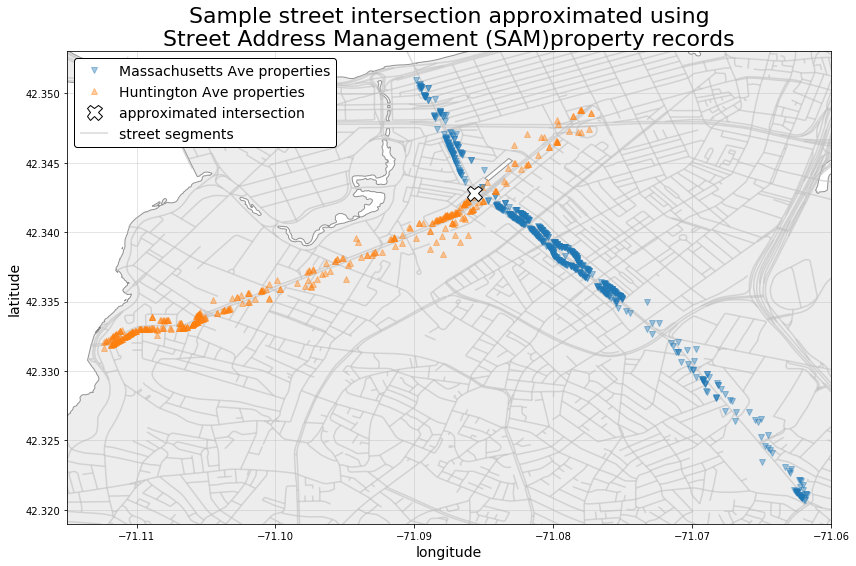

In [76]:
savefig = True

fig, ax = plt.subplots(figsize=(12,12))

gdf_boston.plot(ax=ax, color='lightgray', edgecolor='k', alpha=0.4)
gdf_streets.plot(ax=ax, color='silver', edgecolor='k', alpha=.6, label='street segments')
plt.title(
    'Sample street intersection approximated using\nStreet Address Management (SAM)'\
    'property records',
    fontsize=22
)

for street_id, markershape in zip([locs1, locs2], ['v','^']):
    plt.plot(
        street_arrays[street_id][:,0],
        street_arrays[street_id][:,1],
        markershape,
        alpha=.4,
        label='{0} properties'.format(street_id_map_dict[street_id])
    )

plt.plot(
    mass_hunt_intersection['lat'],
    mass_hunt_intersection['lon'],
    'X',
    markerfacecolor='white',
    markeredgecolor='k',
    markersize=15,
    label='approximated intersection'
)

## circle for plotting threshold perimeter, only works if threshold
## distance is in degrees

# circle = mpatches.Circle(
#     xy=[mass_hunt_intersection['lat'], mass_hunt_intersection['lon']],
#     radius=threshold,
#     ec='k',
#     linestyle='--',
#     fill=False,
#     label='threshold = {0}'.format(threshold)
# )
# ax.add_patch(circle)

plt.xlabel('longitude', fontsize=14)
plt.ylabel('latitude', fontsize=14)
plt.xlim(left=-71.115, right=-71.06)
plt.ylim(bottom=42.319, top=42.353)

# ax.set_aspect('equal')
plt.legend(edgecolor='k', framealpha=1, fontsize=14)
plt.grid(':', alpha=0.4)
plt.tight_layout()
if savefig:
    plt.savefig(os.path.join(FIGURES_ROOT, 'sample-intersection.png'))
plt.show();

In [36]:
%%time
threshold = 100
n_splits = 50 # because the kernel will crash if more than 500K are processed at a time
splits = np.array_split(street_id_combos, n_splits)

street_id_map_dict = {
    street_id: street_name
    for street_id, street_name in zip(
        street_id_key.index,
        street_id_key['FULL_STREET_NAME']
    )
}

print('SPLIT 1:')
intersections_df = id_intersections(
    splits[0],
    street_arrays,
    street_id_map_dict,
    threshold,
    verbose=True
)
print()

for i, split in enumerate(splits[1:]):
    print('SPLIT {}:'.format(i+2)) 
    intersections_df = pd.concat(
         [
             intersections_df,
             id_intersections(
                 split,
                 street_arrays,
                 street_id_map_dict,
                 threshold,
                 verbose=True
             )
         ], ignore_index=True
     )
    print('{0:,} cumulative intersections identified\n'.format(len(intersections_df)))

SPLIT 1:
189,182 street arrays distances calculated, 1,383 intersection returned with a thresholdof 100 meters.

SPLIT 2:
189,182 street arrays distances calculated, 1,159 intersection returned with a thresholdof 100 meters.
2,542 cumulative intersections identified

SPLIT 3:
189,182 street arrays distances calculated, 1,207 intersection returned with a thresholdof 100 meters.
3,749 cumulative intersections identified

SPLIT 4:
189,182 street arrays distances calculated, 1,250 intersection returned with a thresholdof 100 meters.
4,999 cumulative intersections identified

SPLIT 5:
189,182 street arrays distances calculated, 1,144 intersection returned with a thresholdof 100 meters.
6,143 cumulative intersections identified

SPLIT 6:
189,182 street arrays distances calculated, 1,493 intersection returned with a thresholdof 100 meters.
7,636 cumulative intersections identified

SPLIT 7:
189,182 street arrays distances calculated, 1,216 intersection returned with a thresholdof 100 meters.


In [39]:
intersections_df.shape

(63182, 7)

In [40]:
intersections_df.head()

street_id cross_id street       cross        lat        lon  threshold
0         1     1121   A St     Dacy St -71.125670  42.250592        100
1         1     1133   A St    Dana Ave -71.125037  42.250627        100
2         1     1323   A St  Easton Ave -71.124891  42.250328        100
3         1     1475   A St  Factory St -71.125670  42.250592        100
4         1     1494   A St  Faraday St -71.125401  42.250469        100

In [41]:
intersections_df.to_csv(
    os.path.join(WRITE_DIR, 'intersections-{0}.csv'.format(threshold)),
    index=False
)

In [77]:
def plot_intersections(df_locs, intersections_df, threshold, savepath=None, tabcolor='blue'):
    """
    """
    fig, ax = plt.subplots(figsize=(16,10))
    plt.title(
        'Approximated street intersection locations in Boston, based on street property locations\n'\
        '({0:,} possible intersections, identified using a threshold of {1} meters)'.format(
            len(intersections_df),
            threshold
        ), 
        fontsize=21
    )
    gdf_boston.plot(ax=ax, color='lightgray', edgecolor='k', alpha=0.4)
    gdf_streets.plot(ax=ax, color='silver', edgecolor='k', alpha=.6, label='street segments')
    plt.scatter(
        df_locs['X'], df_locs['Y'],
        color='tab:{}'.format(tabcolor), alpha=0.4, s=2,
        label='property records ({})'.format(tabcolor)
    )
    plt.scatter(
        intersections_df['lat'],
        intersections_df['lon'],
        color='k',
        s=1,
        alpha=1,
        label='approx. intersection locations (black)'
    )
    plt.xlabel('longitude', fontsize=14)
    plt.ylabel('latitude', fontsize=14)
    plt.grid(":", alpha=0.4)
    plt.legend(edgecolor='k', framealpha=1, fontsize=14)
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath)
    plt.show();


def plot_intersections_detail(df_locs, intersections_df, threshold, savepath, tabcolor):
    """
    """
    fig, ax = plt.subplots(figsize=(16,10))
    plt.title(
        'Approximated intersection locations in Boston, based on street property locations\n'\
        'detailed view (identified using a threshold of {0} meters)'.format(
            threshold2
        ), 
        fontsize=21
    )

    gdf_boston.plot(ax=ax, color='lightgray', edgecolor='k', alpha=0.4)
    gdf_streets.plot(ax=ax, color='silver', edgecolor='k', alpha=.6, label='street segments')
    plt.scatter(
        df_locs['X'], df_locs['Y'],
        color='tab:{}'.format(tabcolor), alpha=0.4, s=8,
        label='property records ({})'.format(tabcolor)
    )
    plt.plot(
        intersections_df2['lat'],
        intersections_df2['lon'],
        'o',
        color='k',
        ms=3,
        alpha=1,
        label='approx. intersection locations (black)'
    )


    plt.xlabel('longitude', fontsize=14)
    plt.ylabel('latitude', fontsize=14)
    plt.xlim(left=-71.115, right=-71.06)
    plt.ylim(bottom=42.319, top=42.353)

    plt.legend(edgecolor='k', framealpha=1, fontsize=14)
    plt.grid(':', alpha=0.4)
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath)
    plt.show();

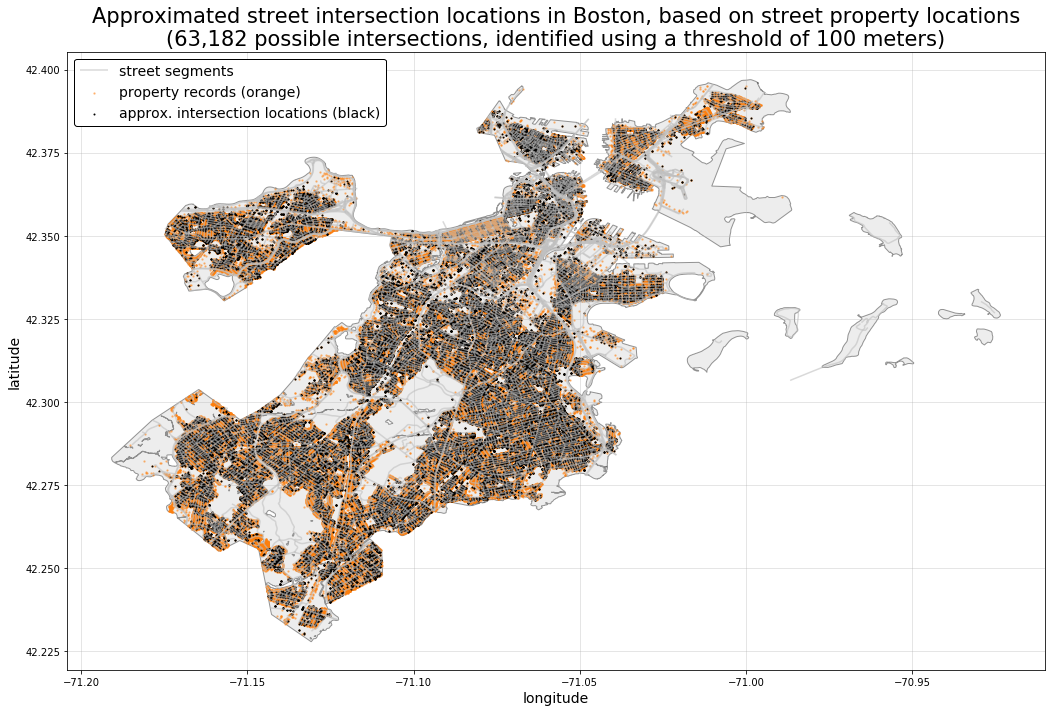

CPU times: user 5.4 s, sys: 3.98 ms, total: 5.4 s
Wall time: 5.4 s


In [78]:
%%time

tabcolor = 'orange'
savepath = os.path.join(FIGURES_ROOT, 'approx-intersections-thresh-{}.png'.format(threshold))

plot_intersections(df_locs, intersections_df, threshold, savepath, tabcolor)

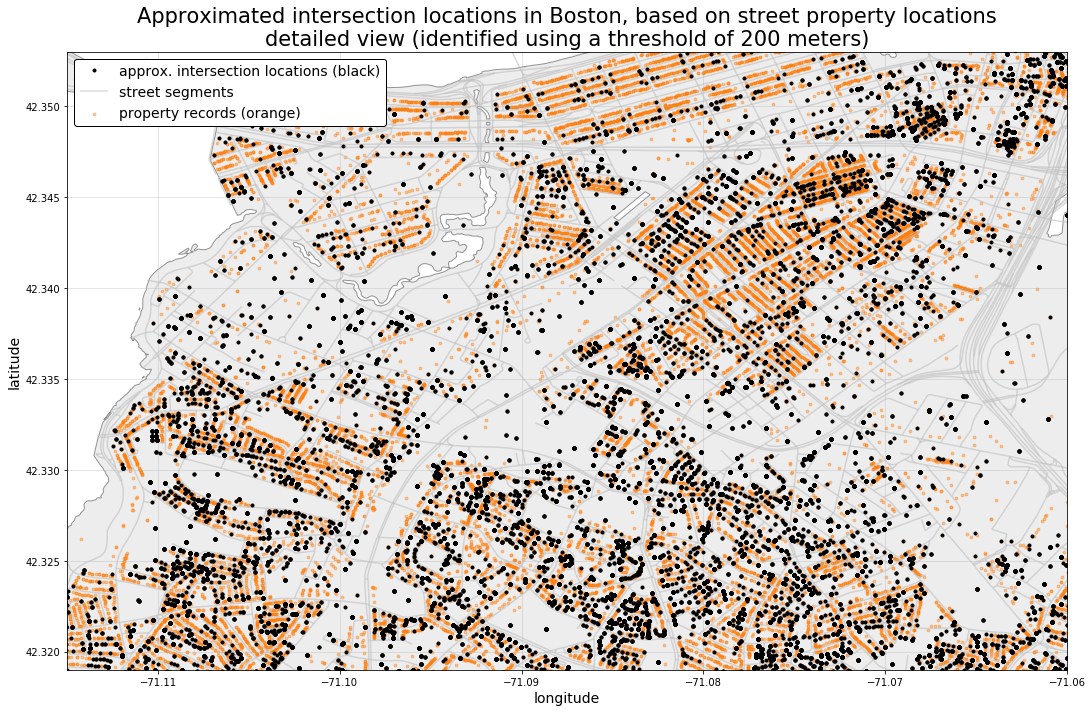

CPU times: user 16.9 s, sys: 123 ms, total: 17.1 s
Wall time: 9.74 s


In [79]:
%%time

tabcolor = 'orange'
savepath = os.path.join(FIGURES_ROOT, 'detail-intersections-thresh-{}.png'.format(threshold))

plot_intersections_detail(df_locs, intersections_df, threshold, savepath, tabcolor)

In [45]:
street_id_key[street_id_key['FULL_STREET_NAME'].str.contains('American Legion')]

FULL_STREET_NAME
STREET_ID                     
112        American Legion Hwy

In [46]:
street_id_key[street_id_key['FULL_STREET_NAME'].str.contains('Hunt')]

FULL_STREET_NAME
STREET_ID                  
2138              Hunter St
2139         Huntington Ave
2140         Huntington Ave
2141          Huntington Rd
2142       S Huntington Ave
2143             Huntoon St

In [47]:
%%time
threshold2 = 200
n_splits = 50 # because the kernel will crash if more than 500K are processed at a time
splits = np.array_split(street_id_combos, n_splits)

street_id_map_dict = {
    street_id: street_name
    for street_id, street_name in zip(
        street_id_key.index,
        street_id_key['FULL_STREET_NAME']
    )
}

print('SPLIT 1:')
intersections_df2 = id_intersections(
    splits[0],
    street_arrays,
    street_id_map_dict,
    threshold2,
    verbose=True
)
print()

for i, split in enumerate(splits[1:]):
    print('SPLIT {}:'.format(i+2)) 
    intersections_df2 = pd.concat(
         [
             intersections_df2,
             id_intersections(
                 split,
                 street_arrays,
                 street_id_map_dict,
                 threshold2,
                 verbose=True
             )
         ], ignore_index=True
     )
    print('{0:,} cumulative intersections identified\n'.format(len(intersections_df2)))

SPLIT 1:
189,182 street arrays distances calculated, 3,163 intersection returned with a thresholdof 200 meters.

SPLIT 2:
189,182 street arrays distances calculated, 2,711 intersection returned with a thresholdof 200 meters.
5,874 cumulative intersections identified

SPLIT 3:
189,182 street arrays distances calculated, 2,648 intersection returned with a thresholdof 200 meters.
8,522 cumulative intersections identified

SPLIT 4:
189,182 street arrays distances calculated, 2,846 intersection returned with a thresholdof 200 meters.
11,368 cumulative intersections identified

SPLIT 5:
189,182 street arrays distances calculated, 2,757 intersection returned with a thresholdof 200 meters.
14,125 cumulative intersections identified

SPLIT 6:
189,182 street arrays distances calculated, 3,287 intersection returned with a thresholdof 200 meters.
17,412 cumulative intersections identified

SPLIT 7:
189,182 street arrays distances calculated, 2,759 intersection returned with a thresholdof 200 meter

In [48]:
intersections_df2.shape

(143561, 7)

In [73]:
intersections_df2.to_csv(
    os.path.join(WRITE_DIR, 'intersections-{0}.csv'.format(threshold2)),
    index=False
)

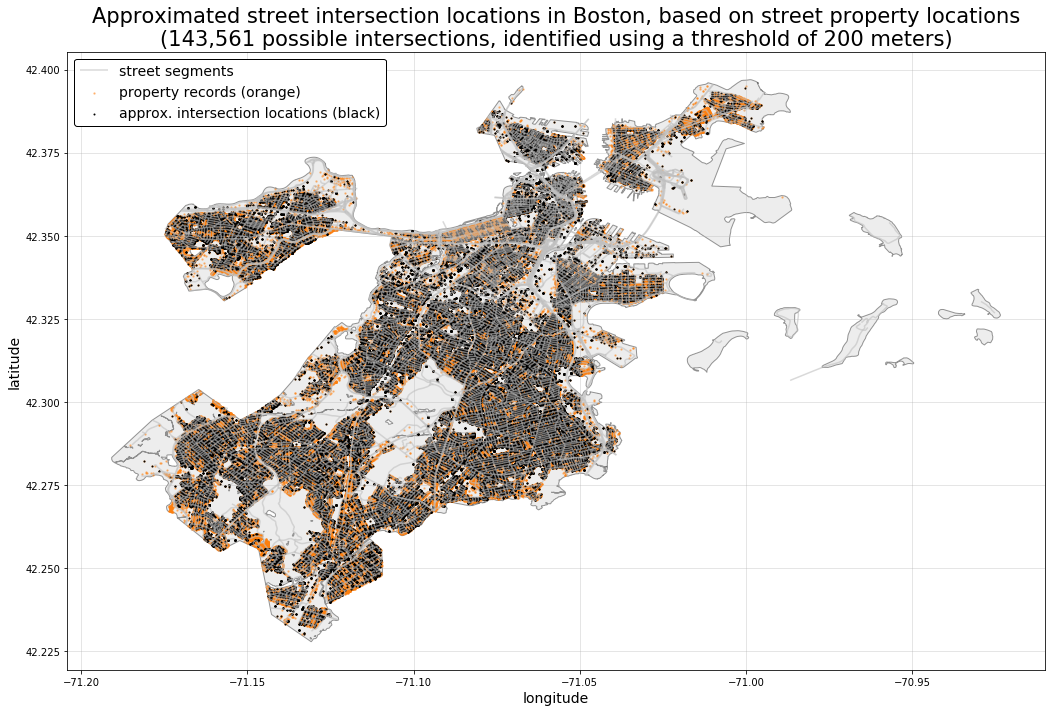

CPU times: user 6.29 s, sys: 35.8 ms, total: 6.33 s
Wall time: 6.33 s


In [80]:
%%time

tabcolor = 'orange'
savepath = os.path.join(FIGURES_ROOT, 'approx-intersections-thresh-{}.png'.format(threshold2))

plot_intersections(df_locs, intersections_df2, threshold2, savepath, tabcolor)

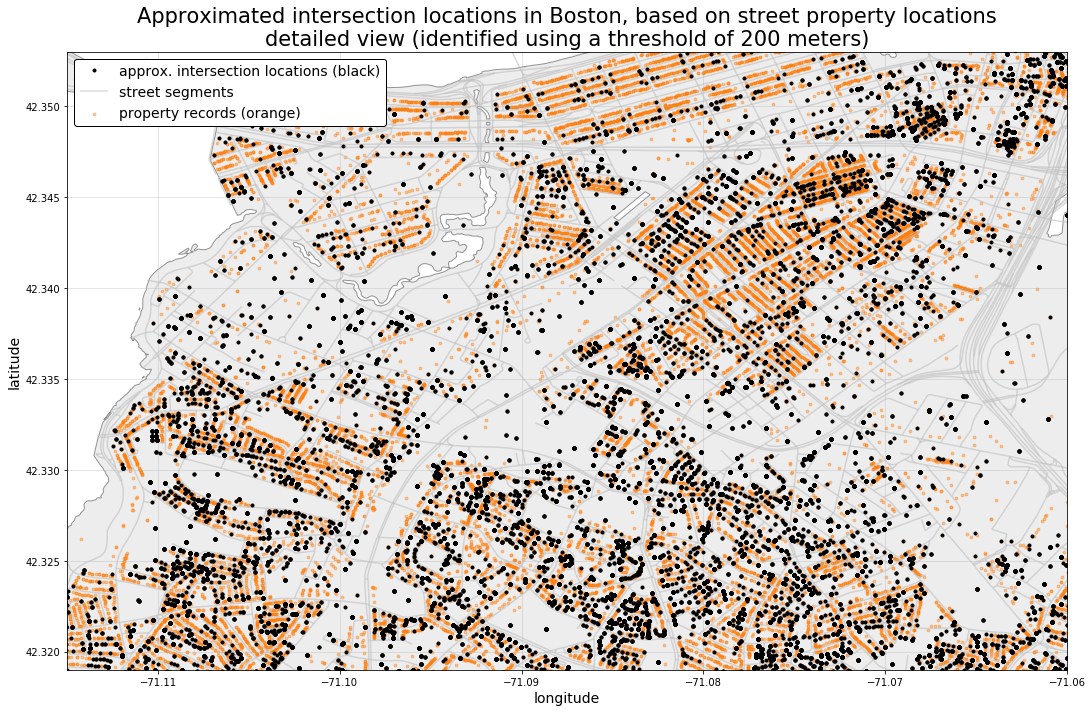

CPU times: user 16.8 s, sys: 124 ms, total: 16.9 s
Wall time: 9.6 s


In [81]:
%%time

tabcolor = 'orange'
savepath = os.path.join(FIGURES_ROOT, 'detail-intersections-thresh-{}.png'.format(threshold2))

plot_intersections_detail(df_locs, intersections_df2, threshold2, savepath, tabcolor)